<a href="https://colab.research.google.com/github/Ganasa18/belajar-tensorflow/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with Tensorflow

A classsification is where you try to classify something as one thing or antoher

A few type of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


# Createing data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
# y
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now. let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

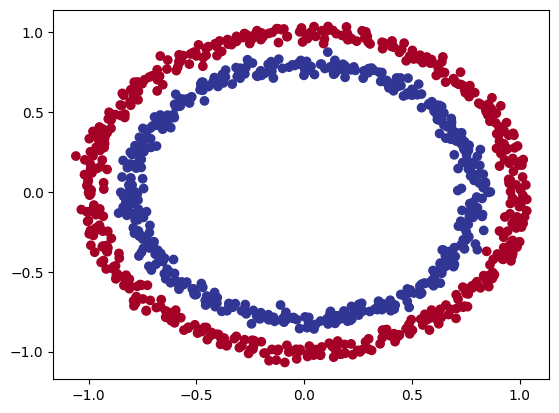

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [8]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the mmodel
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..


how to evaluate classification model
https://www.ritchieng.com/machine-learning-evaluate-classification-model/

In [11]:
#Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 5.6117 - accuracy: 0.5240
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 5.8753 - accuracy: 0.5260
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1683 - accuracy: 0.5360
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1453 - accuracy: 0.5410
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1245 - accuracy: 0.5410


In [13]:
# Let's try and improve our model by  training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we're working on a binary classification promben and our model is getting arround ~50% accuracy.. it's performing as i So let's step things up a notch and add an extra layer

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling the model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layer)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add anther layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5060


[0.7003445029258728, 0.5059999823570251]

To visualize our model's predctions, let's cerate a function `plot_decision_boundary()` this function wills

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make perdictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [19]:
import numpy as np

In [20]:
# model_3.predict(X)
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary cerated by a model predicting on X.\
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  # Meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [21]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [22]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 2ms/step
doing binary classification


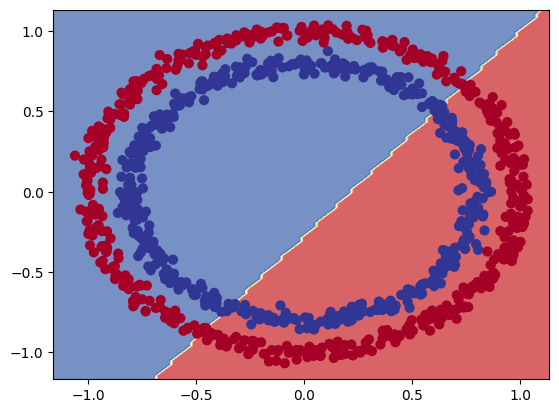

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
# Let's see if our model can be used for a regression problem..
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regerssion data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Ohw wait... we compiled our model for a binary clssification problem.

But... we're noow owkring on a regression problem, ;et's change the model to suit our data.

In [25]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time woth a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 242.5422 - mae: 242.5422
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 116.1300 - mae: 116.1300
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 51.9438 - mae: 51.9438
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 78.6470 - mae: 78.6470
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 59.5153 - mae: 59.5153
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 46.1226 - mae: 46.1226
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 47.3326 - mae: 47.3326
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.8357 - mae: 42.8357
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 42.6062 - mae: 42.6062
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.9718 - mae: 42.9718
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 7ms/step


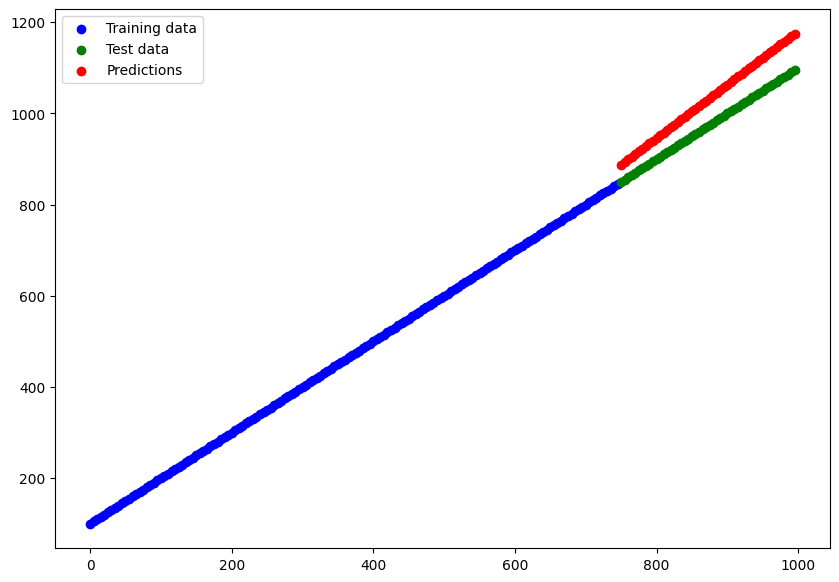

In [26]:
# Make prediciton with our trained model

y_reg_preds = model_3.predict(X_reg_test)
# Plot the model's predection agains our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b",  label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();


In [27]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## The missing piece : Non-linearity

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fiting the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2652 - accuracy: 0.4200
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2371 - accuracy: 0.4320
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2304 - accuracy: 0.4390
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2151 - accuracy: 0.4410
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1991 - accuracy: 0.4440
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1921 - accuracy: 0.4420
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1879 - accuracy: 0.4460
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1744 - accuracy: 0.4490
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.4530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1321 - accuracy: 0.4580
Epoch 11/

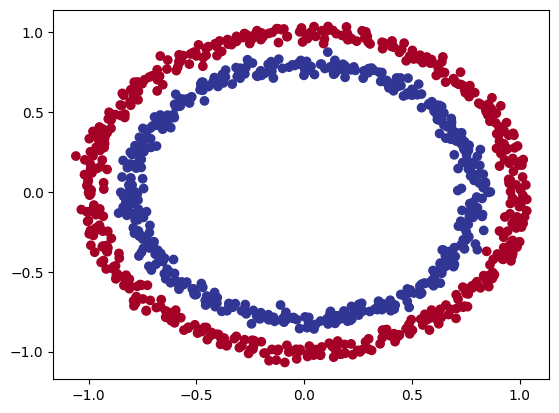

In [29]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


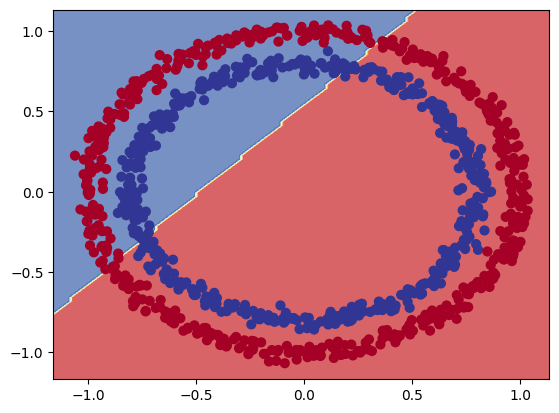

In [30]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try build our first neural network with non linear activation function

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1741 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1491 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1447 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1077 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0886 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0885 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0884 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0884 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0883 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0882 - accuracy: 0.4850
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


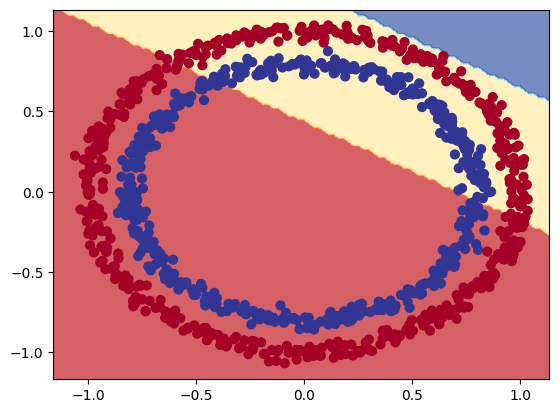

In [32]:
plot_decision_boundary(model_5, X, y)

In [33]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 4.5718 - accuracy: 0.4690
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 4.4037 - accuracy: 0.4780
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 4.1717 - accuracy: 0.4760
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.9772 - accuracy: 0.4740
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 3.7644 - accuracy: 0.4770
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 3.5082 - accuracy: 0.4720
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2227 - accuracy: 0.4720
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1505 - accuracy: 0.4800
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9034 - accuracy: 0.4860
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8269 - accuracy: 0.4860
Epoch 11/

In [34]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9780


[0.06427551060914993, 0.9779999852180481]

313/313 [==============================] - 1s 1ms/step
doing binary classification


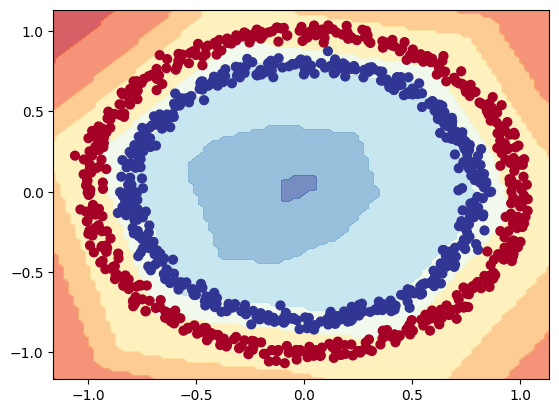

In [35]:
# How do our model prediction look ?
plot_decision_boundary(model_6, X, y)

In [36]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6970 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4720
Epoch 11/

In [37]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.8340


[0.47623541951179504, 0.8339999914169312]

313/313 [==============================] - 1s 2ms/step
doing binary classification


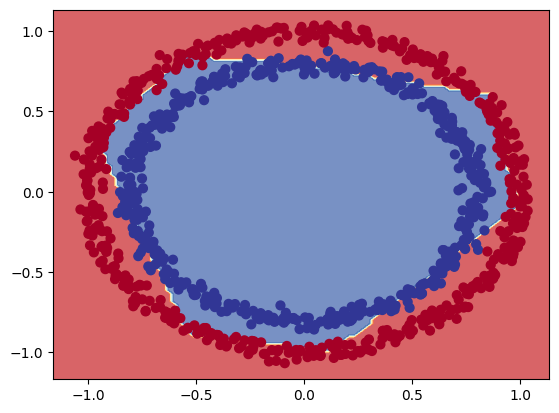

In [38]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question** What's wrong the predictions we've made ? Are we reallly evaluating our model correctly ? Hint: what data did the model learn on and what data did we predict on ?

🗝️ **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [39]:
# Create a toy a tensor (similiar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

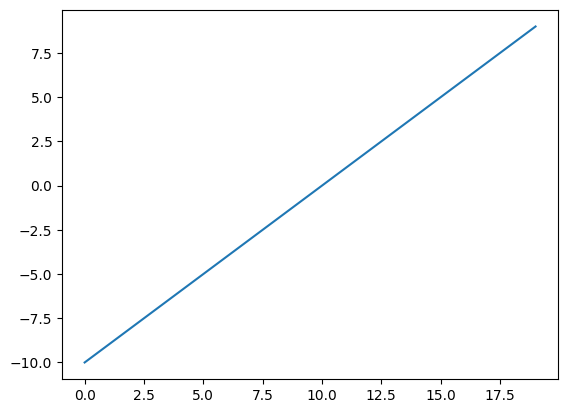

In [40]:
# Visualize our toy tensor
plt.plot(A)

In [41]:
# Let's start by replication sigmoid - sigmoid(x) = 1 / (1 + exp(-x)).
# tf.exponent function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid funtion on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

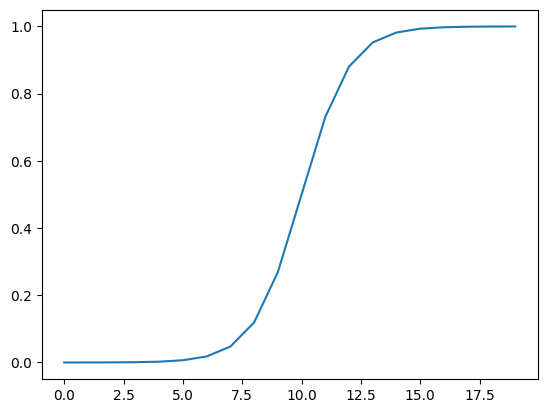

In [42]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [43]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [44]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

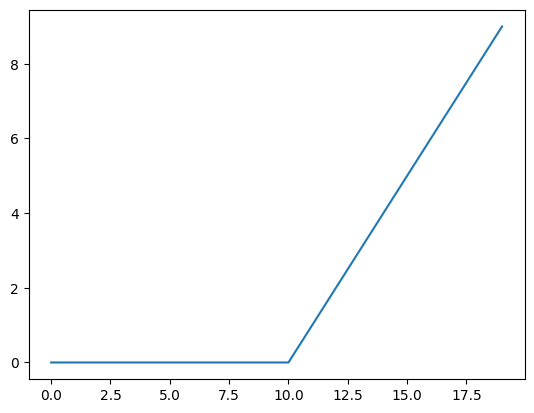

In [45]:
# Plot Relu modifend tensor
plt.plot(relu(A))

In [46]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

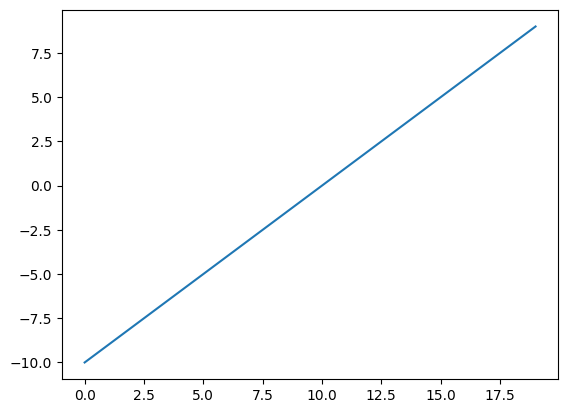

In [47]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [48]:
# Does A even change ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>



```
# cheat sheet
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
```



## Evaluating and improving our classification

In [49]:
# Check how many example we have
len(X)

1000

In [50]:
# Split into train and test sets
X_train , y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [51]:
# Let's recreate a model to fit on the training data and evaluate

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6898 - accuracy: 0.5387
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5775
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5663
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6350
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.5738
Epoch 6/25
25/25 [==============================] - 0s 13ms/step - loss: 0.6534 - accuracy: 0.6062
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6368 - accuracy: 0.6600
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.7212
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7588
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7725
Epoch 11/25
25/25 

In [52]:
# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0950 - accuracy: 0.9850


[0.09495802223682404, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


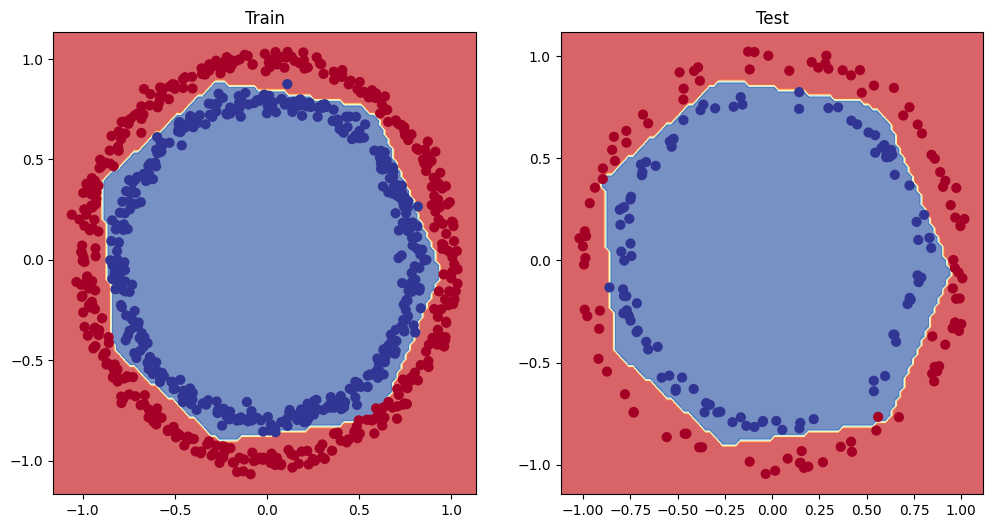

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # one row, 2 column and first value
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [54]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Plot the loss (or training) curves

In [55]:
# history.history
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689779,0.53875
1,0.686002,0.57750
2,0.681362,0.56625
3,0.674083,0.63500
4,0.666434,0.57375
5,0.653450,0.60625
6,0.636850,0.66000
7,0.617186,0.72125
8,0.587311,0.75875
9,0.544862,0.77250


Text(0.5, 1.0, 'Model_8 loss curves')

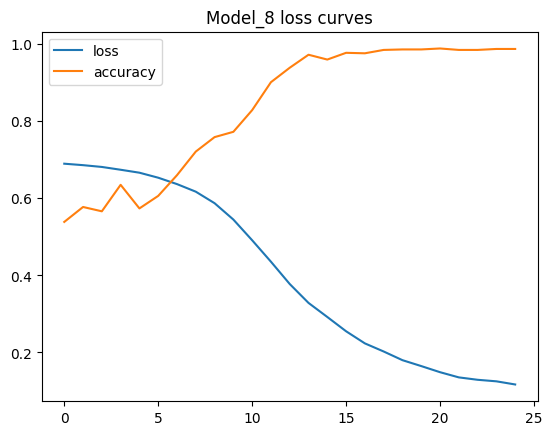

In [56]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🗝️ **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the moost during training) we're going to use
the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [57]:
#  Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Crate a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4888 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4837 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4825 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

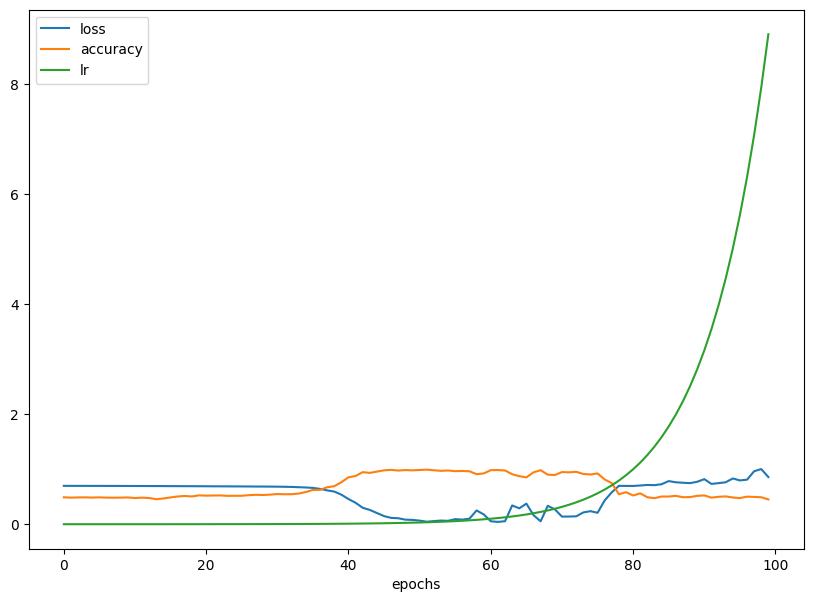

In [58]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

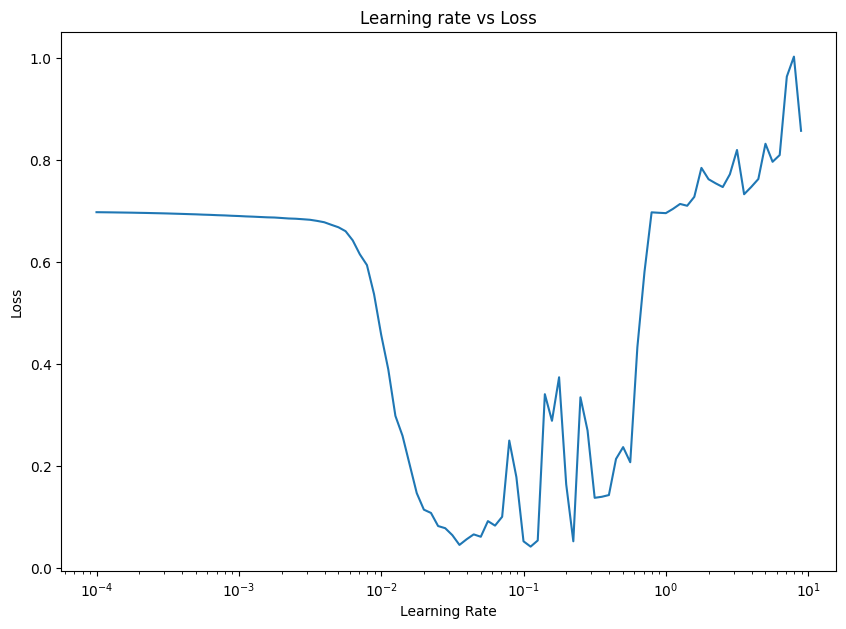

In [59]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
# lrs
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [60]:
len(lrs)

100

In [61]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [62]:
# Learning rate we used before (model_8)
10**-1

0.1

In [63]:
# Let's try using a higher *ideal* learning rate with the same model
# Set random seed
tf.random.set_seed(42)
# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal learning reate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# 3. Fit the model for 20 epchs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5512
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5813
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6087
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6675
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7138
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7638
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7650
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7975
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8375
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8763
Epoch 11/20
25/25 [

In [64]:
# Evaluate model 10 on the test dataset
# Got lowest lost value than model_8 and get better accuracy than model_8
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9900


[0.06994030624628067, 0.9900000095367432]

In [65]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0950 - accuracy: 0.9850


[0.09495802223682404, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


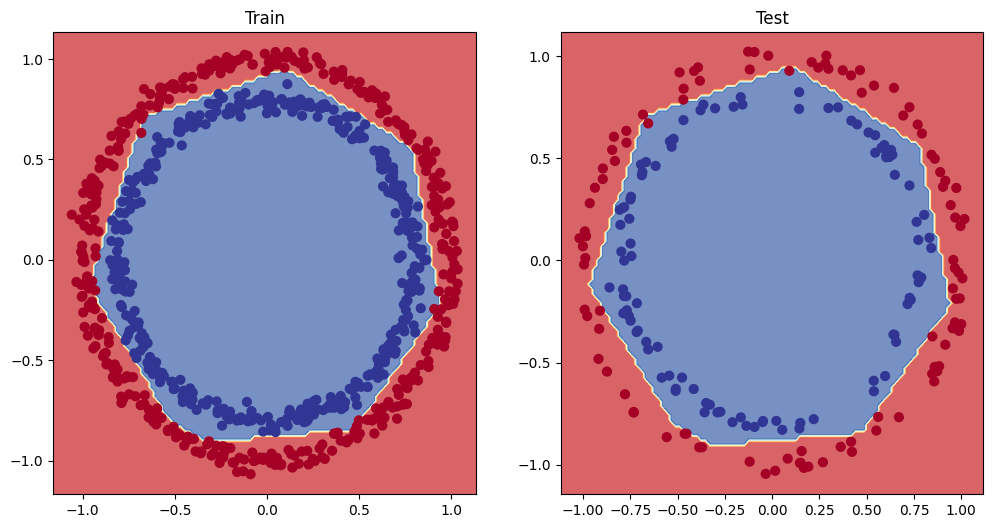

In [66]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show;

## More classification evaluation methods

Alongside visualizing our models reuslt as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [67]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9900
Model loss on the test set : 0.06994030624628067
Model accuracy on the test set: 99.00%


## How about a confusion matrix ?

In [68]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Ooops.. looks like our predictions array has come out in **prediction probability** form.. the standart output from the sigmoid (or softmax) activation functions.

In [69]:
y_preds[:10], y_test[:10]

(array([[0.9571928 ],
        [0.9571928 ],
        [0.943554  ],
        [0.9571928 ],
        [0.05808445],
        [0.0306318 ],
        [0.9438862 ],
        [0.0021621 ],
        [0.9571928 ],
        [0.01610025]], dtype=float32),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]))

In [70]:
# Convert prediction probabilities to binary format view the first 10
# if greather than 5 to 1 and lower make to 0
tf.round(y_preds)[:10]


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>